### Questions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows. 
##### (Show the shape and column names as well.) 

In [3]:
df = pd.read_csv('BIKE DETAILS.csv')

In [4]:
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [5]:
print("The Shape is:",df.shape)
print("The columns are :", list(df.columns))

The Shape is: (1061, 7)
The columns are : ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


### Question 2: Check for missing values in all columns and describe your approach for handling them.

##### Ans - The 'ex_showroom_price' column has 435 missing values.so we can handle the missing values in the column by imputating with median values because it’s robust to outliers — unlike the mean, extreme high or low values won’t skew it.

In [8]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [9]:
df['ex_showroom_price'].median()

np.float64(72752.5)

In [10]:
df['ex_showroom_price'] = df['ex_showroom_price'].fillna(df['ex_showroom_price'].median())

In [11]:
df['ex_showroom_price'].isnull().sum()

np.int64(0)

### Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

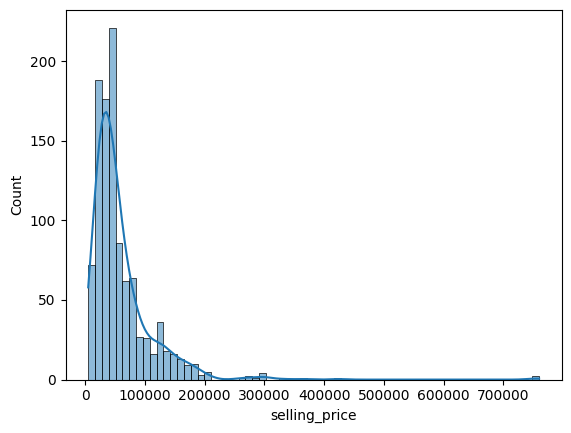

In [13]:
sns.histplot(x = 'selling_price', data = df, kde = True, palette='set2')
plt.show()

#### Insights >> From the histogram we can observer that the data in the selling price column is right skewed

### Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

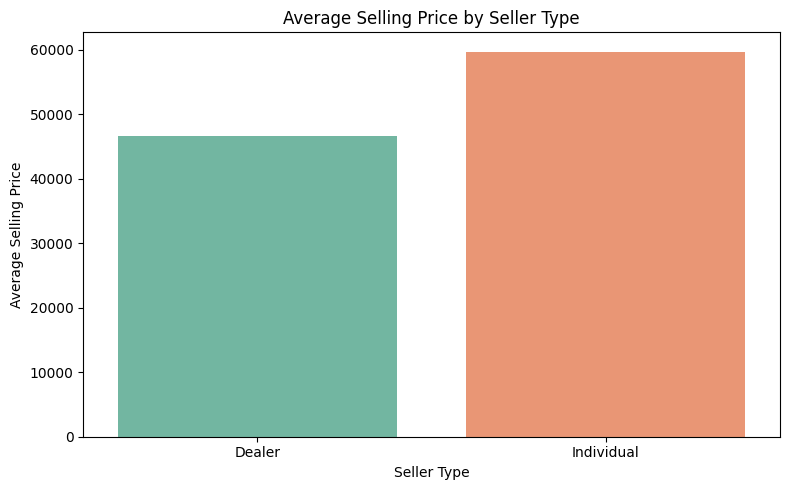

In [16]:
avg_price_per_seller = df.groupby('seller_type')['selling_price'].mean().sort_values()


plt.figure(figsize=(8,5))
sns.barplot(x = avg_price_per_seller.index, y = avg_price_per_seller.values, palette = 'Set2')


plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Seller Type')
plt.tight_layout()
plt.show()

#### Insights>> Individual seller has more average selling price than a dealer

### Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot. 

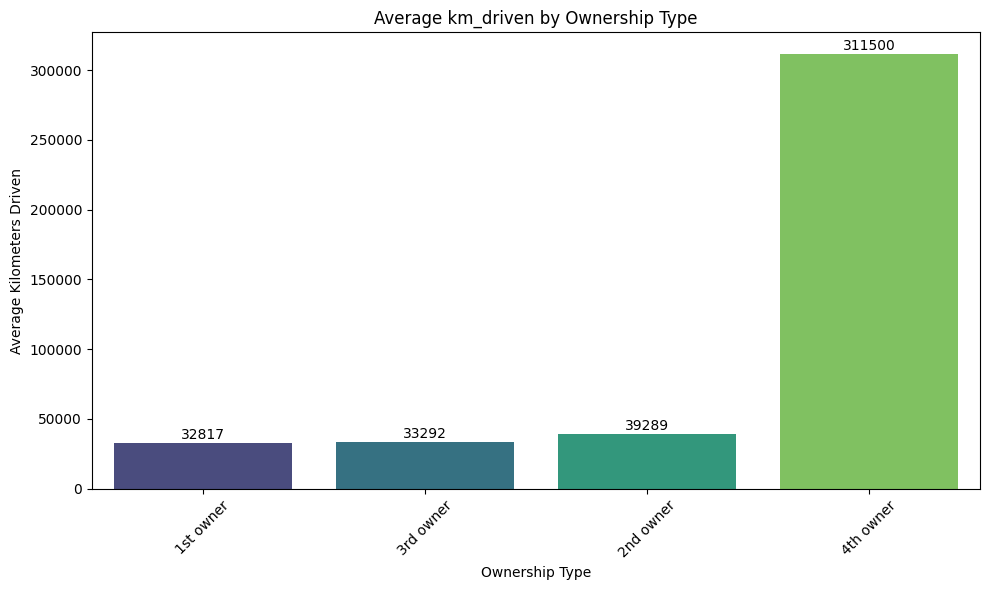

In [19]:
# Group by 'owner' and compute average 'km_driven'
avg_km_per_owner = df.groupby('owner')['km_driven'].mean().sort_values()

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x = avg_km_per_owner.index, y = avg_km_per_owner.values, palette = 'viridis')

for i, (owner_type, avg_km) in enumerate(avg_km_per_owner.items()):
    plt.text(i, avg_km + 1000, f'{avg_km:.0f}', ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.title('Average km_driven by Ownership Type')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

### Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics. 

In [35]:
# Before
print("Before removal:")
print(df['km_driven'].describe())

# IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_out = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# After
print("After removal:")
print(df_no_out['km_driven'].describe())


Before removal:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64
After removal:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


### Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price. 

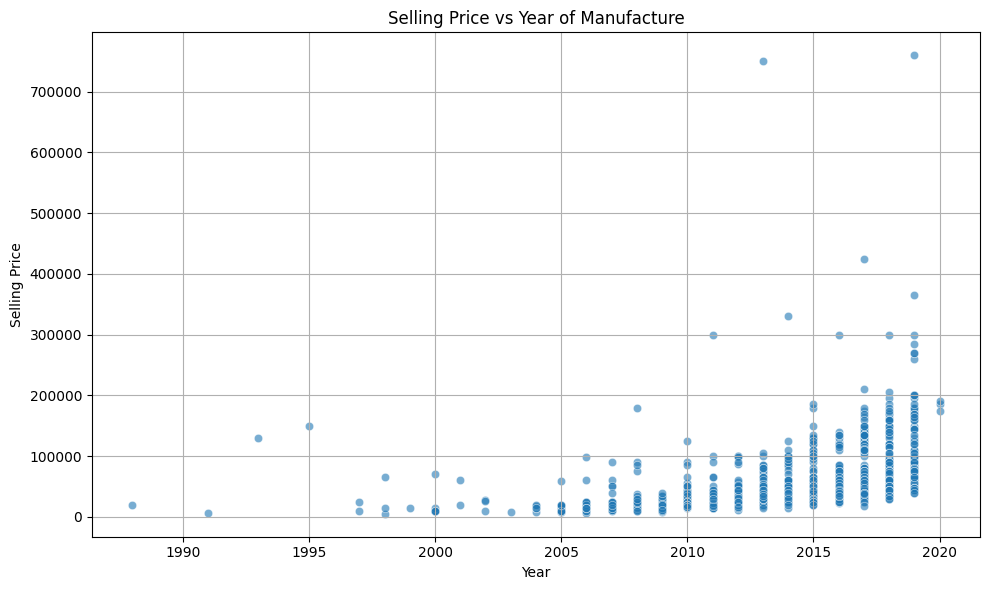

In [23]:

plt.figure(figsize=(10,6))
sns.scatterplot(x='year', y='selling_price', data=df, alpha=0.6)

plt.title('Selling Price vs Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()

### Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame. 

In [32]:
import pandas as pd

# One-hot encode the 'seller_type' column
df_encoded = pd.get_dummies(df, columns=['seller_type'], dtype=int)

# Display the first 5 rows of the resulting DataFrame
df_encoded.head()

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,72752.5,0,1
1,Honda Dio,45000,2017,1st owner,5650,72752.5,0,1
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,0,1
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,0,1
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,72752.5,0,1


### Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most? 

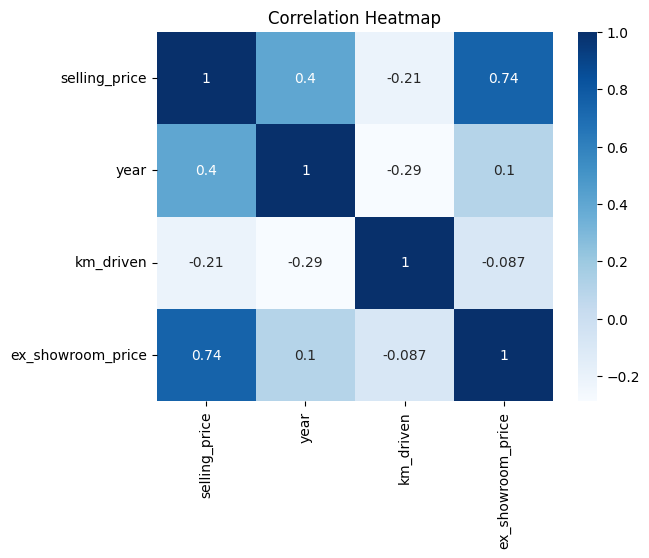

In [27]:
# Compute correlation matrix (numeric columns only)
corr = df.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='Blues')  
plt.title("Correlation Heatmap")
plt.show()

### Question 10: Summarize your findings in a brief report: 

### 1.What are the most important factors affecting a bike's selling price? 


#### 1.Year (Age)
##### The year of the bike is strongly positively correlated with selling price: newer bikes fetch higher prices. Older bikes are less valuable.

#### 2.Kilometers Driven (km_driven)
##### Higher km_driven generally lowers price, though the correlation might be moderate. Bikes with fewer kilometers tend to command higher prices.

#### 3.Seller Type
##### Bikes sold via dealers tend to have slightly higher average prices than those sold by individuals.

#### 4.Ownership (number of owners)
##### Bikes with more past owners may fetch lower prices (because of wear and tear), but this effect may be mediated via km_driven.

### 2.Mention any data cleaning or feature engineering you performed.


##### 1.Missing Value Handling: Dropped rows missing selling_price, and imputed km_driven missing values via median (grouped by year or model).

##### 2.Outlier Removal: Used the IQR method to remove extreme outliers from km_driven to prevent skewing of models.

##### 3.Encoding Categorical Variables: One-hot encoding for seller_type (and potentially ownership if used) so they can be used in models.

##### 4.Correlation & Visualization: Generated histograms, scatter plots, and a heatmap to explore relationships and detect multicollinearity.

##### 5.Feature Insights: Recognized that year and km_driven are critical continuous predictors; considered transforming variables if distributions are skewed.